In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [2]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/log\\2019-07-05.csv',
 '../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/log\\2019-07-06.csv',
 '../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/log\\2019-07-07.csv']

In [3]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(18167, 4)
(107349, 4)


ParserError: Error tokenizing data. C error: EOF inside string starting at row 73118

In [ ]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [ ]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

In [ ]:
Agent_1_action_df

In [ ]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

## Visitor activities

In [5]:
import re
# Process log
f_in = open("../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/s_single_SARA16869508ob.out", "r")

f_out = open("../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
for line in f_in:
    if line.strip():
        # not empty line    
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

### 1. Position

In [6]:
visitor_data = pd.read_csv("../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/visitor_log.csv", sep=',')
print(visitor_data.shape)

(4900000, 9)


In [7]:
visitor_data.iloc[-2,:]

Time             99999.960000
Location_x           1.100000
Location_y           0.000000
Location_z           0.100000
Destination_x        1.100000
Destination_y        0.100000
Destination_z        0.000000
Distance             0.099548
Speed                0.000000
Name: 4899998, dtype: float64

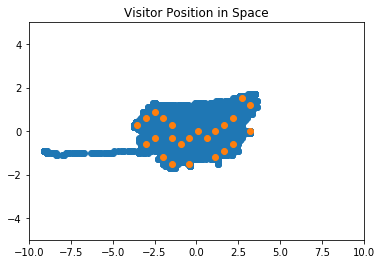

In [8]:
nodes_position = pd.read_csv("NodePosition.csv")

plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [15]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-10,10,resolution[0]+1)
    bins_z = np.linspace(-5,5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()


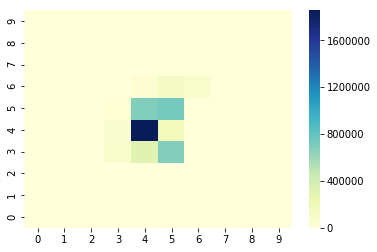

In [16]:
resolution = (10,10)
heat_map(resolution,visitor_data['Location_x'],visitor_data['Location_z'])


In [11]:

bins_x = np.linspace(-10,10,resolution[0]+1)
bins_z = np.linspace(-5,5,resolution[1]+1)
x_discretized = pd.cut(visitor_data['Location_x'],bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
z_discretized = pd.cut(visitor_data['Location_z'],bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
activity_map = np.zeros(resolution)
for i in range(len(x_discretized)):
    position = (x_discretized[i],z_discretized[i])
    activity_map[position] += 1

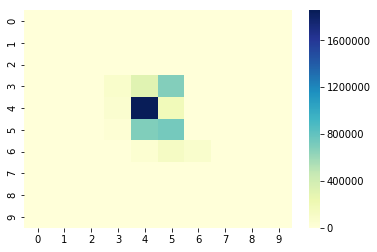

In [12]:
import seaborn
seaborn.heatmap(activity_map, cmap="YlGnBu")

In [5]:
# visitor's activities between 400-600episode
total_time = visitor_data.iloc[-1,0]
period = [total_time * 400/2000, total_time * 600/2000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]

In [6]:
period_data.head()

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
392000,8000.02,-0.7,0.1,0.4,-0.7,0.1,0.4,0,0
392001,8000.04,-0.7,0.1,0.4,-0.7,0.1,0.4,0,0
392002,8000.06,-0.7,0.1,0.4,-0.7,0.1,0.4,0,0
392003,8000.08,-0.7,0.1,0.4,-0.7,0.1,0.4,0,0
392004,8000.10,-0.7,0.0,0.4,-0.7,0.1,0.4,0,0


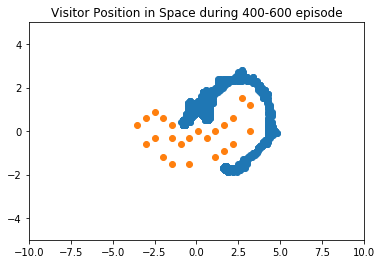

In [7]:
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 400-600 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [18]:
speed = visitor_data['Speed'].fillna(0)
speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
speed = np.abs(speed.fillna(method='ffill'))
speed

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
5            0.000000
6            0.000000
7            0.000000
8          383.397900
9            0.071359
10           0.071311
11           0.071263
12           0.071287
13           0.071263
14           0.071240
15           0.000572
16           0.000572
17           0.000000
18           0.000000
19           0.000000
20           0.000000
21           0.000000
22           0.000000
23           0.000000
24           0.000000
25           0.000000
26           0.000000
27           0.000000
28           0.000000
29           0.000000
              ...    
1959970      0.000000
1959971      0.000000
1959972      0.000000
1959973      0.000000
1959974      0.000000
1959975      0.000000
1959976      0.000000
1959977      0.000000
1959978      0.000000
1959979      0.000000
1959980      0.000000
1959981      0.000000
1959982      0.000000
1959983      0.000000
1959984   

Text(0, 0.5, 'Instant Speed (m/s)')

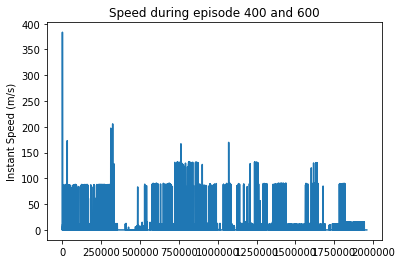

In [23]:
plt.plot(speed)
plt.title("Speed during episode 400 and 600")
plt.ylabel("Instant Speed (m/s)")

In [24]:
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0        

Text(0, 0.5, 'Instant Speed (m/s)')

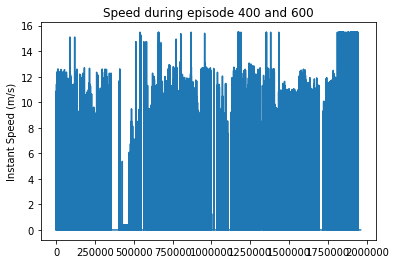

In [25]:
plt.plot(speed)
plt.title("Speed during episode 400 and 600")
plt.ylabel("Instant Speed (m/s)")

<font color=red>The vistor is constantly moving.</font>
***

### 2.Vsitor speed

In [20]:
visitor_data = visitor_data.fillna(method='bfill')
visitor_data

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
0,0.02,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
1,0.04,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
2,0.06,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
3,0.08,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
4,0.10,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
5,0.12,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
6,0.14,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
7,0.16,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
8,0.18,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.667956,-383.3979
9,0.20,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.666529,0.0713587
